<a href="https://colab.research.google.com/github/peisuke/ml-works/blob/main/5/5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- 本コードは以下のサイトを参考にしました
- https://www.randpy.tokyo/entry/python_random_forest

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn import metrics, preprocessing, model_selection

In [2]:
data = load_wine()
X=data.data
y=data.target

sc=preprocessing.StandardScaler()
sc.fit(X)
X_std=sc.transform(X)

In [3]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, train_label, test_label=model_selection.train_test_split(X_std, y, test_size=0.1, random_state=0)

clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, train_label)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [4]:
from sklearn.metrics import roc_curve, auc, accuracy_score

pred = clf.predict(X_test)
fpr, tpr, thresholds = roc_curve(test_label, pred, pos_label=1)
print('auc:', auc(fpr, tpr))
print('accuracy:', accuracy_score(pred, test_label))

auc: 0.5454545454545454
accuracy: 1.0


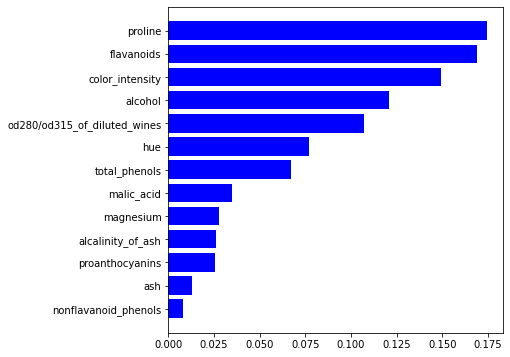

In [5]:
features = np.array(data.feature_names)
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(6,6))
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.show()